**Importing necessary libraries from TensorFlow and Keras**

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers

 **Mounting Google Drive to access files**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing and extracting zip files**

In [4]:
# Importing necessary library for handling zip files
import zipfile

# Setting paths for training and validation zip files
train_zip_path = '/content/drive/MyDrive/train.zip'
valid_zip_path = '/content/drive/MyDrive/valid.zip'

# Directory to extract zip files
extract_dir = '/content/extracted_data'

# Extracting training and validation zip files
# Extract the train.zip file
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Extract the valid.zip file
with zipfile.ZipFile(valid_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [5]:
# Importing os module to handle file operations
import os

# Checking if data extraction was successful
extract_dir = '/content/extracted_data'

# Checking if data extraction was successful
if os.path.exists(extract_dir):
    print("Data extraction successful.")

    # Looping through extracted directory to count files in subfolders
    for root, dirs, files in os.walk(extract_dir):
        if root != extract_dir:  # Exclude the main extraction directory
            subfolder_name = root[len(extract_dir)+1:]
            file_count = len(files)
            print(f"Subfolder: {subfolder_name}, File count: {file_count}")
else:
    print("Data extraction failed. The extraction directory does not exist.")


Data extraction successful.
Subfolder: train, File count: 0
Subfolder: train/grated, File count: 605
Subfolder: train/jullienne, File count: 499
Subfolder: train/mixed, File count: 503
Subfolder: train/juiced, File count: 723
Subfolder: train/creamy_paste, File count: 595
Subfolder: train/diced, File count: 698
Subfolder: train/sliced, File count: 948
Subfolder: train/other, File count: 807
Subfolder: train/peeled, File count: 558
Subfolder: train/floured, File count: 511
Subfolder: train/whole, File count: 766
Subfolder: valid, File count: 0
Subfolder: valid/grated, File count: 131
Subfolder: valid/jullienne, File count: 110
Subfolder: valid/mixed, File count: 99
Subfolder: valid/juiced, File count: 147
Subfolder: valid/creamy_paste, File count: 124
Subfolder: valid/diced, File count: 144
Subfolder: valid/sliced, File count: 237
Subfolder: valid/other, File count: 164
Subfolder: valid/peeled, File count: 102
Subfolder: valid/floured, File count: 110
Subfolder: valid/whole, File count:

In [6]:
import os

# Setting paths for train and validation image folders
train_folder_path = '/content/extracted_data/train'
valid_folder_path='/content/extracted_data/valid'
# Function to count the number of image files in a directory
def count_images(directory):
    num_images = sum([len(files) for _, _, files in os.walk(directory)])
    return num_images

# Counting images in train and validation folders
num_train_images_train = count_images(train_folder_path)
num_train_images_valid = count_images(valid_folder_path)

print("Number of images in train folder:", num_train_images_train)
print("Number of images in valid folder:", num_train_images_valid)


Number of images in train folder: 7213
Number of images in valid folder: 1543


In [7]:
# Normalization factor for images
image_rescaler = 1./255

**Data augmentation and preparation**

In [11]:
# Creating image data generators for training and validation data
training_data_generator = ImageDataGenerator(rescale=image_rescaler)
validation_data_generator = ImageDataGenerator(rescale=image_rescaler)

In [12]:
# Directories for training and validation data
training_data_directory = '/content/extracted_data/train'
validation_data_directory = '/content/extracted_data/valid'

**Generating batches of augmented data from the directories**

In [14]:
# Data generators for training and validation
training_generator = training_data_generator.flow_from_directory(
    training_data_directory,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_directory,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

Found 7213 images belonging to 11 classes.
Found 1543 images belonging to 11 classes.


**Model architecture**

In [15]:
# Defining the architecture of the convolutional neural network
convolutional_neural_network = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(11, activation='softmax')
])

In [16]:
# Model compilation
convolutional_neural_network.compile(loss='categorical_crossentropy',
                                     optimizer='adam',
                                     metrics=['accuracy'])

In [18]:
convolutional_neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [19]:
# Model training
training_history = convolutional_neural_network.fit(
    training_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 151s 1s/step - loss: 2.3984 - accuracy: 0.1300 - val_loss: 2.3116 - val_accuracy: 0.1430
Epoch 2/10
100/100 [==============================] - 146s 1s/step - loss: 2.2211 - accuracy: 0.2002 - val_loss: 2.1780 - val_accuracy: 0.2170
Epoch 3/10
100/100 [==============================] - 157s 2s/step - loss: 2.1477 - accuracy: 0.2325 - val_loss: 2.3095 - val_accuracy: 0.1770
Epoch 4/10
100/100 [==============================] - 147s 1s/step - loss: 2.0698 - accuracy: 0.2534 - val_loss: 2.0509 - val_accuracy: 0.2570
Epoch 5/10
100/100 [==============================] - 146s 1s/step - loss: 1.9740 - accuracy: 0.2965 - val_loss: 2.1003 - val_accuracy: 0.2470
Epoch 6/10
100/100 [==============================] - 151s 2s/step - loss: 1.9192 - accuracy: 0.3255 - val_loss: 2.0590 - val_accuracy: 0.2860
Epoch 7/10
100/100 [==============================] - 146s 1s/step - loss: 1.7979 - accuracy: 0.3695 - val_loss: 2.0525 - val_accuracy: 0.2990

**Saving the trained model**

In [20]:
# Defining the filepath to save the model
model_save_path = '/content/my_model_project1-part2.h5'

# Save the model
convolutional_neural_network.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Printing training and validation metrics for each epoch**

In [21]:

# Printing the training and validation metrics for each epoch
best_val_accuracy = max(training_history.history['val_accuracy'])
best_epoch = training_history.history['val_accuracy'].index(best_val_accuracy) + 1
print(f"Best Validation Accuracy: {best_val_accuracy * 100:.2f}% (Epoch {best_epoch})\n")

for epoch in range(len(training_history.history['accuracy'])):
    print(f"Epoch {epoch+1}/{len(training_history.history['accuracy'])}")
    print(f"{'Training Accuracy:':<20} {training_history.history['accuracy'][epoch]*100:.2f}%")
    print(f"{'Validation Accuracy:':<20} {training_history.history['val_accuracy'][epoch]*100:.2f}%")
    print(f"{'Training Loss:':<20} {training_history.history['loss'][epoch]:.4f}")
    print(f"{'Validation Loss:':<20} {training_history.history['val_loss'][epoch]:.4f}\n")




Best Validation Accuracy: 30.60% (Epoch 10)

Epoch 1/10
Training Accuracy:   13.00%
Validation Accuracy: 14.30%
Training Loss:       2.3984
Validation Loss:     2.3116

Epoch 2/10
Training Accuracy:   20.02%
Validation Accuracy: 21.70%
Training Loss:       2.2211
Validation Loss:     2.1780

Epoch 3/10
Training Accuracy:   23.25%
Validation Accuracy: 17.70%
Training Loss:       2.1477
Validation Loss:     2.3095

Epoch 4/10
Training Accuracy:   25.34%
Validation Accuracy: 25.70%
Training Loss:       2.0698
Validation Loss:     2.0509

Epoch 5/10
Training Accuracy:   29.65%
Validation Accuracy: 24.70%
Training Loss:       1.9740
Validation Loss:     2.1003

Epoch 6/10
Training Accuracy:   32.55%
Validation Accuracy: 28.60%
Training Loss:       1.9192
Validation Loss:     2.0590

Epoch 7/10
Training Accuracy:   36.95%
Validation Accuracy: 29.90%
Training Loss:       1.7979
Validation Loss:     2.0525

Epoch 8/10
Training Accuracy:   43.20%
Validation Accuracy: 29.70%
Training Loss:      

**Plotting training and validation accuracy, and loss over epochs**

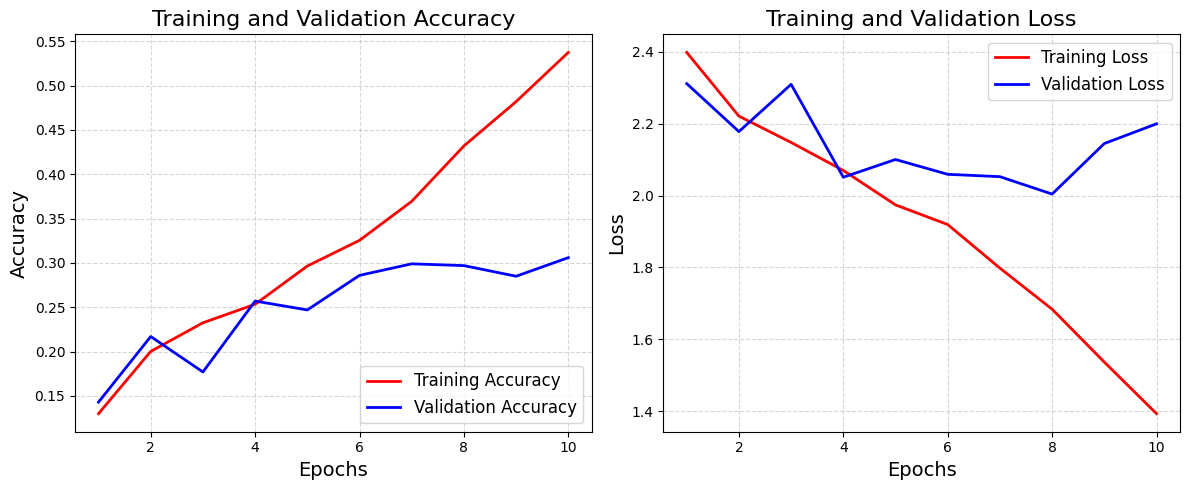

In [22]:
import matplotlib.pyplot as plt

try:
    # Extracting values for plotting
    epochs = range(1, len(training_history.history['accuracy']) + 1)
    training_accuracy = training_history.history['accuracy']
    validation_accuracy = training_history.history['val_accuracy']
    training_loss = training_history.history['loss']
    validation_loss = training_history.history['val_loss']

    # Plotting training and validation accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_accuracy, 'r', label='Training Accuracy', linewidth=2)
    plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy', linewidth=2)
    plt.title('Training and Validation Accuracy', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, training_loss, 'r', label='Training Loss', linewidth=2)
    plt.plot(epochs, validation_loss, 'b', label='Validation Loss', linewidth=2)
    plt.title('Training and Validation Loss', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)


    plt.tight_layout()
    plt.show()

except Exception as e:
    print("An error occurred while plotting the data:", e)


**Testing Script**

In [42]:
import json
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import logging


# Configure logging
logging.basicConfig(level=logging.INFO)

# Load the trained model
model_path = 'my_model_project1-part2.h5'
if not os.path.exists(model_path):
    logging.error("Model file not found.")
    exit()


# Directory containing test dataset images
test_images_dir = '/content/drive/MyDrive/test/anonymous'


# Deriving Path to the JSON file in the folder structure
json_file_path = 'ground_truth.json'


# Loading actual labels from JSON file
try:
    # Load actual labels from JSON file
    with open(json_file_path, 'r') as file:
        actual_labels = json.load(file)
except FileNotFoundError:
    print("Error: JSON file not found.")
    exit()


# Initializing variables to count correct predictions and total predictions
correct_predictions = 0
total_predictions = 0

class_names = ['creamy_paste',
 'diced',
 'floured',
 'grated',
 'juiced',
 'jullienne',
 'mixed',
 'other',
 'peeled',
 'sliced',
 'whole']
#Iterating over test images
for image_filename in os.listdir(test_images_dir):
    if image_filename in actual_labels:
        image_filepath = os.path.join(test_images_dir, image_filename)

        img = image.load_img(image_filepath, target_size=(150, 150))
        image_arr = image.img_to_array(img)
        image_arr = np.expand_dims(image_arr, axis=0)
        image_arr /= 255.

        prediction = trained_model.predict(image_arr)
        predicted_index = np.argmax(prediction)
        predicted_class = class_names[predicted_index]

        actual_class = actual_labels[image_filename]
        if predicted_class == actual_class:
            correct_predictions += 1
        total_predictions += 1


accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
print(f"Accuracy: {accuracy * 100:.2f}%")




1/1 [==============================] - 0s 42ms/step
Accuracy: 33.08%
